In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil.parser import parse
from tb import *

In [2]:
tb = TB(config_file='config_gbv.ini',device_name='CO2')

["cdm4160","cjmcu811","fatal","heartbeat","loadavg1","loadavg15","loadavg5","mh-z14a","notice","sen0219","sen0219avg","sen0219cma","sen0220","t3022","uptime","uptime-linux"]


In [3]:
sen = tb.get_df(key="sen0220")


In [5]:
sensores = ["cdm4160","cjmcu811","sen0219","t3022","mh-z14a","sen0220"]
datos = pd.concat([tb.get_df(key=sensor) for sensor in sensores],axis=1)
# print(datos.head())
datos.index = datos.index + pd.Timedelta("-6H")
# print(datos.head())

In [6]:
#corta los datos de la fecha inicial al final
datos = datos["2021-06-24":]

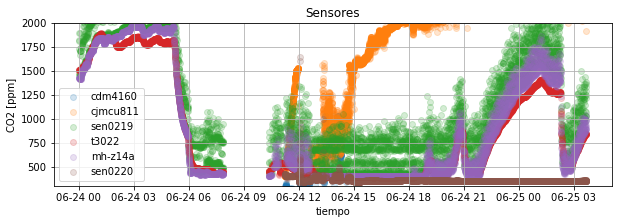

In [9]:
fig, ax = plt.subplots(figsize=(10,3))

# fecha1 = parse("2021-06-22") 
# fecha2 = fecha1 + pd.Timedelta("1D")
# ax.set_xlim(fecha1,fecha2)

ax.set_ylim(300,2000)
ax.set_ylabel("CO2 [ppm]")
ax.set_xlabel("tiempo")
ax.set_title("Sensores")
ax.grid()

for sensor in sensores:
    ax.scatter(datos[sensor].index,datos[sensor],label=sensor,alpha=0.2)

ax.legend()



In [8]:
datos.to_csv("../data/sensores_20210624.csv")